## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="pinot_banner_weinglas_mit_flasche_vor_schwarz.jpg">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

The best approach is to use supervised learning, specifically classification models, to predict red wine quality based on physicochemical properties. Methods like logistic regression, decision trees, or random forests are suitable. Exploratory Data Analysis (EDA) will help identify key indicators, and dimensionality reduction like PCA can simplify feature selection.

Reason: These models can accurately classify wine quality and identify the most important physicochemical properties for prediction.

-------------

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

We need data on physicochemical properties such as acidity, sugar content, pH, alcohol, and sulphates. The target variable is wine quality, typically rated on a scale.

-----


### Data Collection

**Q3. From where do we get our data?**

The data can be sourced from the UCI Machine Learning Repository, which provides a Red Wine Quality Dataset containing relevant physicochemical properties and quality ratings.

---------

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

Red wine samples are usually sourced from wineries, vineyards, or wine producers. They may also come from certification organizations or quality testing laboratories where the wines undergo quality evaluations. In research, datasets can be collected from industry collaborations or public sources like the UCI Machine Learning Repository.

----------

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Producers can refine production processes by focusing on the key factors that improve wine quality.
Distributors can tailor their marketing strategies based on factors that appeal to consumers.
Retailers can make better stocking decisions by predicting wine quality and customer demand.
Certification bodies can speed up assessments by relying on measurable chemical properties instead of subjective tasting alone.

----------------
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

In [5]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [7]:
# variable information 
print(wine_quality.variables) 

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

In [8]:
# Check the shape of features (X) and target (y)
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (6497, 11)
Shape of y (target): (6497, 1)


In [9]:
# Check data types of the features
print("Data types of features:\n", X.dtypes)

Data types of features:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object


In [10]:
print(X.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

### Data Preparation

#### Explore the dataset further
------------
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [11]:
# Check for missing values in the dataset
print("Missing values in features:\n", X.isnull().sum())

Missing values in features:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


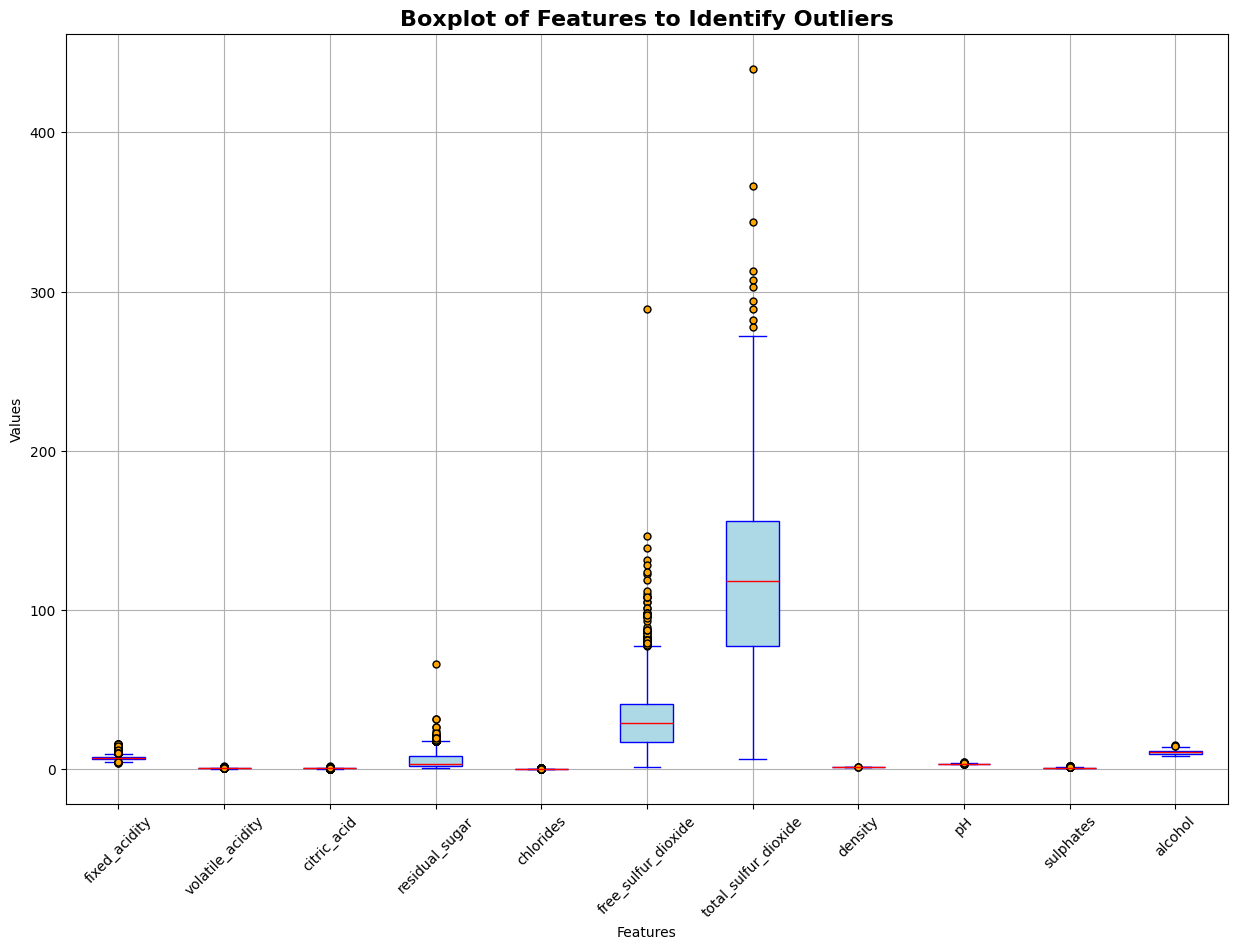

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for each feature to check for outliers
plt.figure(figsize=(15, 10))

# Customizing the boxplot colors and properties
box = X.boxplot(
    patch_artist=True,  # Allow color fill
    boxprops=dict(facecolor='lightblue', color='blue'),  # Color of box
    medianprops=dict(color='red'),  # Color of median line
    whiskerprops=dict(color='blue'),  # Color of whiskers
    capprops=dict(color='blue'),  # Color of caps
    flierprops=dict(markerfacecolor='orange', marker='o', markersize=5)  # Color and size of outliers
)

plt.xticks(rotation=45)
plt.title("Boxplot of Features to Identify Outliers", fontsize=16, fontweight='bold')
plt.ylabel('Values')
plt.xlabel('Features')

# Show the plot
plt.show()

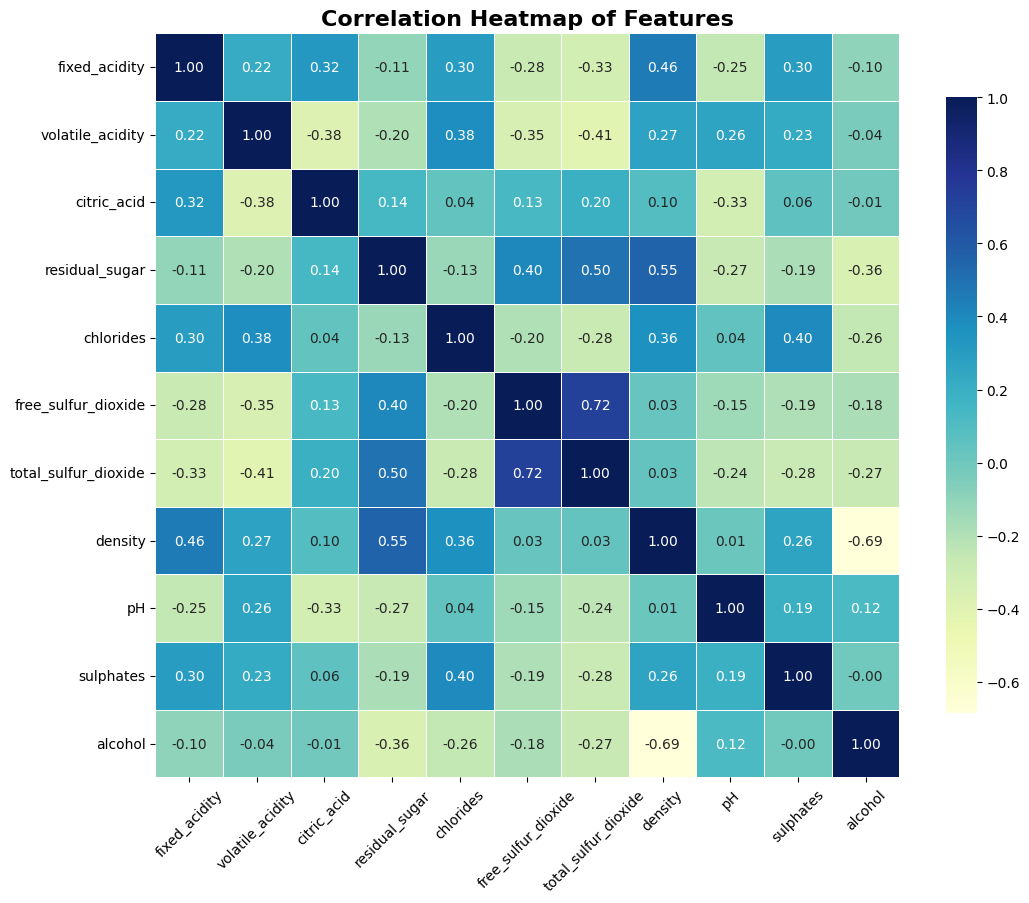

In [14]:
# Plot correlation heatmap with customized layout and color
plt.figure(figsize=(12, 10))  # Adjust the figure size for better clarity
correlation_matrix = X.corr()

# Use sns.heatmap with customization options
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show values on the heatmap
    cmap='YlGnBu',  # Change color scheme, 'YlGnBu' is yellow-green-blue
    fmt='.2f',  # Format annotations to 2 decimal places
    linewidths=0.5,  # Add lines between cells for better separation
    linecolor='white',  # Color of the lines between cells
    cbar_kws={"shrink": 0.8},  # Shrink color bar
    square=True  # Make each cell square-shaped
)

plt.title("Correlation Heatmap of Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


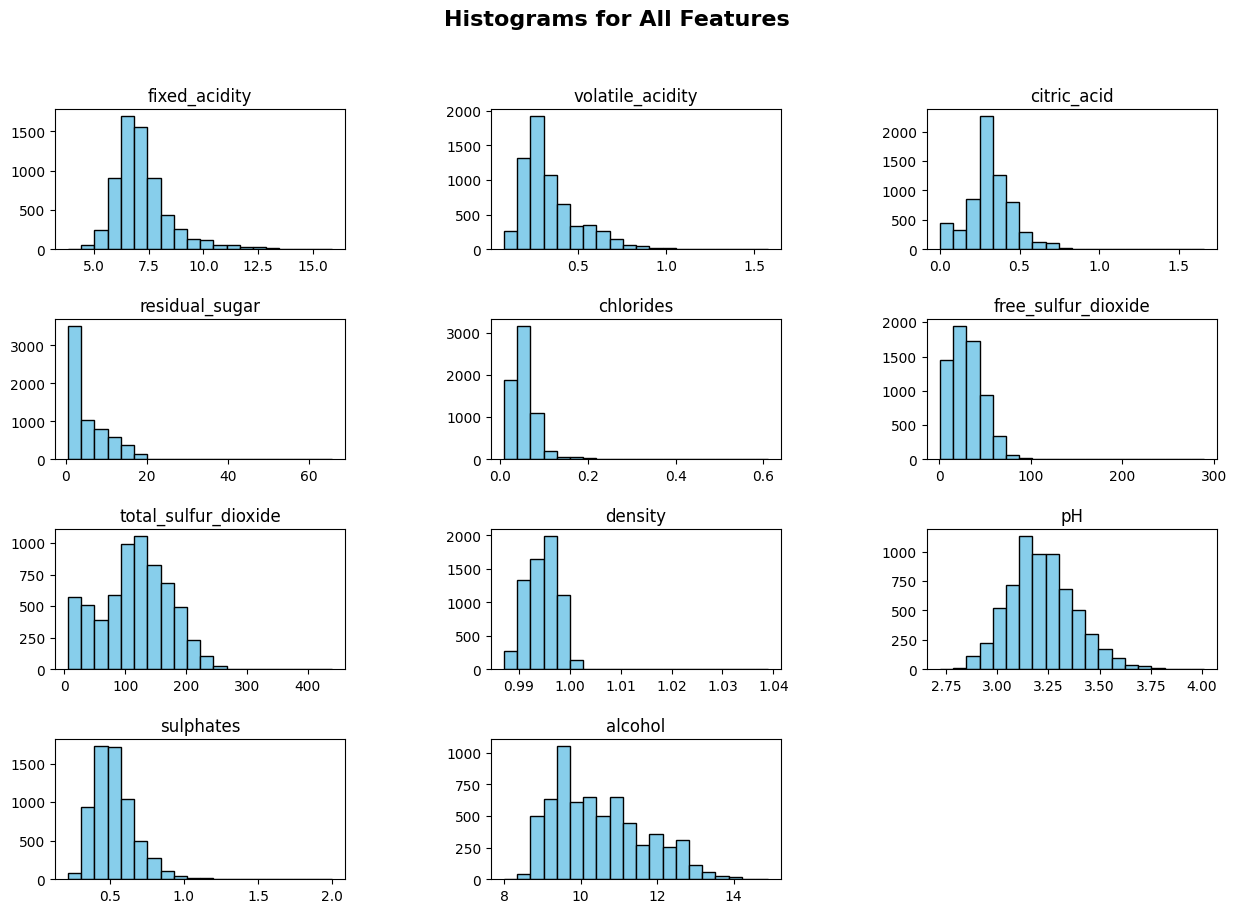

In [15]:
# Histograms for all features with customized layout and colors
X.hist(
    bins=20,                    # Number of bins
    figsize=(15, 10),            # Size of the figure
    color='skyblue',             # Change the color of the bars
    edgecolor='black',           # Add black edges to the bars for clarity
    grid=False                   # Remove grid lines for a cleaner look
)

# Add a main title and adjust layout
plt.suptitle('Histograms for All Features', fontsize=16, fontweight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between plots
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data is now prepared for modeling.")

Data is now prepared for modeling.


### Modeling

<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 

# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha for regularization strength

# Fit models
linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test_scaled)
ridge_predictions = ridge_model.predict(X_test_scaled)

# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Print evaluation metrics
print("Linear Regression MSE:", linear_mse)
print("Linear Regression R²:", linear_r2)

print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression R²:", ridge_r2)

Linear Regression MSE: 0.532571366772436
Linear Regression R²: 0.27009020069080636
Ridge Regression MSE: 0.5325412415090222
Ridge Regression R²: 0.2701314885375522


### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

------------
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [18]:
# Calculate R² for both models
linear_r2 = r2_score(y_test, linear_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Calculate RMSE for both models
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

# Calculate MAE for both models
linear_mae = mean_absolute_error(y_test, linear_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)

# Print evaluation metrics
print("Linear Regression Metrics:")
print("R²:", linear_r2)
print("RMSE:", linear_rmse)
print("MAE:", linear_mae)

print("\nRidge Regression Metrics:")
print("R²:", ridge_r2)
print("RMSE:", ridge_rmse)
print("MAE:", ridge_mae)

Linear Regression Metrics:
R²: 0.27009020069080636
RMSE: 0.7297748740347505
MAE: 0.5639225414937125

Ridge Regression Metrics:
R²: 0.2701314885375522
RMSE: 0.7297542336355591
MAE: 0.5639151119280424


R²: Both models (Linear and Ridge Regression) have an R² value of approximately 0.2701, indicating they explain about 27% of the variance in wine quality. This suggests limited predictive power.

RMSE: The RMSE for both models is nearly the same (0.7298), showing comparable average prediction error magnitudes.

MAE: The MAE values are also similar (0.5639), indicating that the average absolute prediction errors are alike for both models.

Conclusion
Both models perform similarly, with Ridge Regression showing marginally better metrics. However, the overall low R² suggests exploring additional features or more complex models may improve predictions.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

C:\Users\nmlto\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [24]:
# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

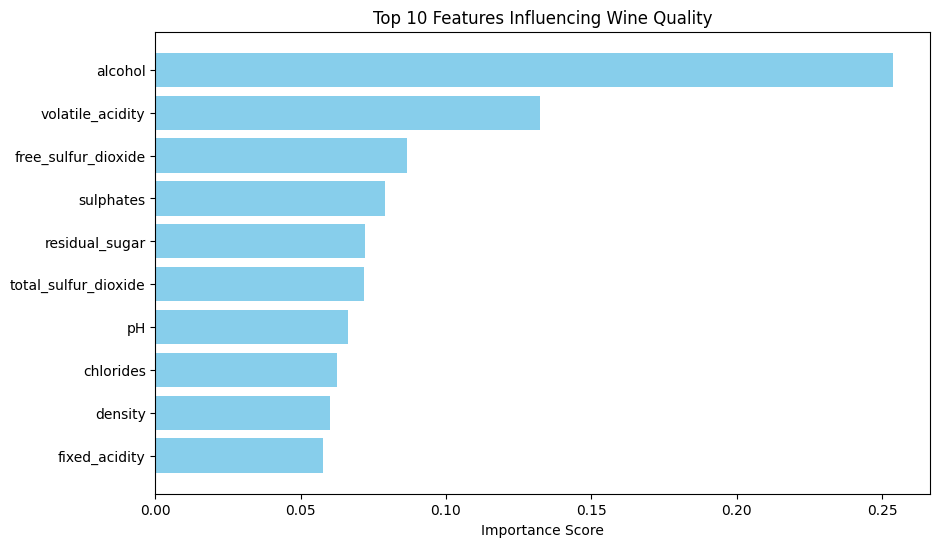

In [25]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Features Influencing Wine Quality')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

### Conclusion

The analysis of feature importance scores reveals that alcohol content is the most significant predictor of red wine quality, indicating its critical role in consumer perception. Following closely are volatile acidity, free sulfur dioxide, and sulphates, which also contribute meaningfully to quality assessment.

These findings suggest that wine producers should prioritize the optimization of these key attributes in their production processes to enhance product quality and appeal. Conversely, features such as fixed acidity and density have lower influence scores, indicating they may play a lesser role in quality evaluation.

Overall, this data-driven approach offers valuable insights for the red wine industry, guiding producers in refining their practices and ensuring that their products meet consumer expectations effectively. Further exploration of additional factors, including sensory evaluations and market trends, could enhance the understanding of wine quality dynamics.